In [1]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import support
from support import DATASET, NR_PLACES, NR_TRANSITIONS, NAMES_TO_TRANSITION, activities
# Import data

df = DATASET.copy()



In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("evaluate", support.fitness)

toolbox.register("attr_int", np.random.randint, 0, NR_PLACES) 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2*NR_TRANSITIONS) # generate 24 ints between 0 and 9
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [4]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
stats.register("std", np.std)


CXPB = 0.7      # Crossover Probability
MUTPB = 0.2      # Mutation Probability
NGEN = 40        # Number of Generations
POPSIZE = 100     # Population Size
INDPB = 0.2       # Individual Probability
TOURNSIZE = 3       # Tournament Size

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)

hof = tools.HallOfFame(1)
pop = toolbox.population(n=POPSIZE) # 100 individuals
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	min	max     	std    
0  	100   	-9.49904	-18	-2.65324	3.02809
1  	77    	-7.6396 	-14	-0.703243	2.57625
2  	74    	-5.79859	-16	-0.703243	2.70876
3  	82    	-4.38312	-14	0.296757 	2.72678
4  	74    	-3.05471	-10	0.346757 	2.42769
5  	70    	-1.93555	-10	0.432851 	2.20015
6  	90    	-1.91533	-12	0.478469 	2.73442
7  	84    	-1.34467	-11.9101	0.478469 	2.75394
8  	79    	-0.642527	-9.73658	0.559041 	2.25704
9  	71    	-1.00051 	-10     	0.566136 	2.70784
10 	72    	-1.1249  	-13.6083	0.585181 	2.85561
11 	78    	-0.548023	-9      	0.639284 	2.06372
12 	76    	-0.687981	-17     	0.639284 	2.68602
13 	74    	-0.756133	-9      	0.639284 	2.41943
14 	82    	-0.783111	-13     	0.639284 	2.64407
15 	66    	-0.551522	-11     	0.639284 	2.73032


KeyboardInterrupt: 

In [ ]:
best_ind = hof[0]
print("\n--- Best Individual Found ---")

best_matrix = support.list_to_array(best_ind)
print(best_matrix)


--- Best Individual Found ---


AttributeError: module 'support' has no attribute 'list_to_dfay'

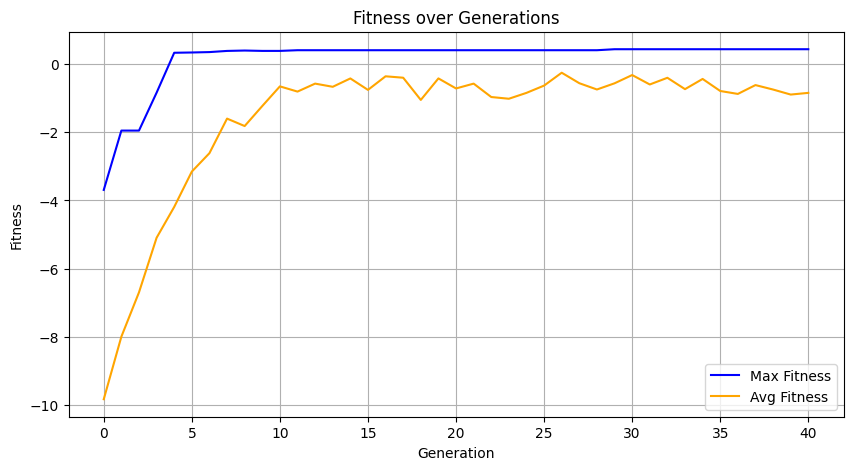

In [ ]:
## Plotting the results
import matplotlib.pyplot as plt

gen = logbook.select("gen")
fit_max = logbook.select("max")
fit_avg = logbook.select("avg")

plt.figure(figsize=(10, 5))
plt.plot(gen, fit_max, label="Max Fitness", color='blue')
plt.plot(gen, fit_avg, label="Avg Fitness", color='orange')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over Generations")
plt.legend()
plt.grid()
plt.show()

# Q2

In [29]:
# Setup toolbox once again for the final evaluation
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define algorithm parameters
POPSIZE = 100
CXPB = 0.7
MUTPB = 0.2
NGEN = 3
TOURNSIZE = 3
INDPB = 0.2

toolbox = base.Toolbox()
toolbox.register("evaluate", support.fitness)
toolbox.register("attr_int", np.random.randint, 0, NR_PLACES)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2*NR_TRANSITIONS) # generate 24 ints between 0 and 9
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)

C:\Users\20193567\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\20193567\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [30]:
def run_combination(toolbox, crossover, mutation, selection, ngen, popsize, indpb, tournsize):
    '''Run the genetic algorithm with the specified parameters and return the max fitness values over generations.
    Parameters:
    toolbox: DEAP toolbox with registered functions
    crossover: Crossover function to use
    mutation: Mutation function to use
    selection: Selection function to use
    ngen: Number of generations to run
    popsize: Population size
    indpb: Individual probability for mutation
    tournsize: Tournament size for selection (only if selection is "selTournament")

    returns:
    max_fitness: List of max fitness values over generations
    '''
    # Register the crossover, mutation, and selection methods
    toolbox.register("mate", crossover)
    toolbox.register("mutate", mutation, indpb=indpb)
    if selection == tools.selTournament:
        toolbox.register("select", selection, tournsize=tournsize)
    else:
        toolbox.register("select", selection)

    # Create the population, register stats and run the algorithm
    pop = toolbox.population(n=popsize) # 100 individuals
    hof = tools.HallOfFame(1)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=ngen, stats=stats, halloffame=hof, verbose=True)

    best_ind = hof[0]
    print("\n--- Best Individual Found ---")
    best_matrix = support.list_to_array(best_ind)
    print(best_matrix)
    print("Best Fitness:", best_ind.fitness.values[0])

    max_fitness = logbook.select("max")
    return max_fitness

def plot_ABF(ABF, labels):
    '''Plot the average fitness values over generations for different combinations of crossover, mutation, and selection methods.
    Parameters:
    avg_fitness_arr: arrays of average fitness values for different combinations
    gen: number of generations
    '''
    plt.figure(figsize=(10, 5))
    for i in range(len(ABF)):
        plt.plot(range(len(ABF[i])), ABF[i], label=labels[i])
    plt.xlabel("Generation")
    plt.ylabel("Avg Fitness")
    plt.title("Avg Fitness over Generations")
    plt.legend()
    plt.grid()
    plt.show()

def plot_boxplot(max_fitness, labels):
    '''Plot boxplots of the average fitness values for different combinations of crossover, mutation, and selection methods.
    Parameters:
    max_fitness: arrays of max fitness values for different combinations
    labels: labels for the boxplots
    '''
    plt.figure(figsize=(10, 5))
    plt.boxplot(max_fitness, labels=labels)
    plt.xticks(rotation=45)
    plt.xlabel("Combinations")
    plt.ylabel("Max Fitness")
    plt.title("Boxplot of max Fitness")
    plt.grid()
    plt.show()
    

Running combination: cxTwoPoint, mutFlipBit, selTournament (combination 1/1)
Run 1/3
gen	nevals	max     
0  	100   	-3.49918
1  	84    	-0.910084
2  	74    	-0.910084
3  	71    	-0.643953

--- Best Individual Found ---
[[0 2]
 [3 6]
 [2 4]
 [3 8]
 [5 6]
 [0 7]
 [7 8]
 [2 2]
 [4 7]
 [5 7]
 [5 8]
 [0 4]]
Best Fitness: -0.6439534632034631
Run 2/3
gen	nevals	max     
0  	100   	-1.53542
1  	76    	-1.68172
2  	81    	-1.68172
3  	81    	-1.54084

--- Best Individual Found ---
[[5 3]
 [3 8]
 [3 5]
 [5 6]
 [3 5]
 [0 3]
 [1 6]
 [8 5]
 [1 6]
 [5 8]
 [2 6]
 [4 5]]
Best Fitness: -1.5354198579198584
Run 3/3
gen	nevals	max     
0  	100   	-4.65829
1  	73    	-2.95574
2  	71    	-1.92403
3  	78    	-0.89905

--- Best Individual Found ---
[[0 6]
 [6 8]
 [2 4]
 [0 5]
 [0 1]
 [4 4]
 [2 4]
 [0 6]
 [3 8]
 [6 8]
 [1 8]
 [6 7]]
Best Fitness: -0.899050061050061
Finished combination: cxTwoPoint, mutFlipBit, selTournament
Average time taken for cxTwoPoint, mutFlipBit, selTournament: 12.98 seconds
-----------

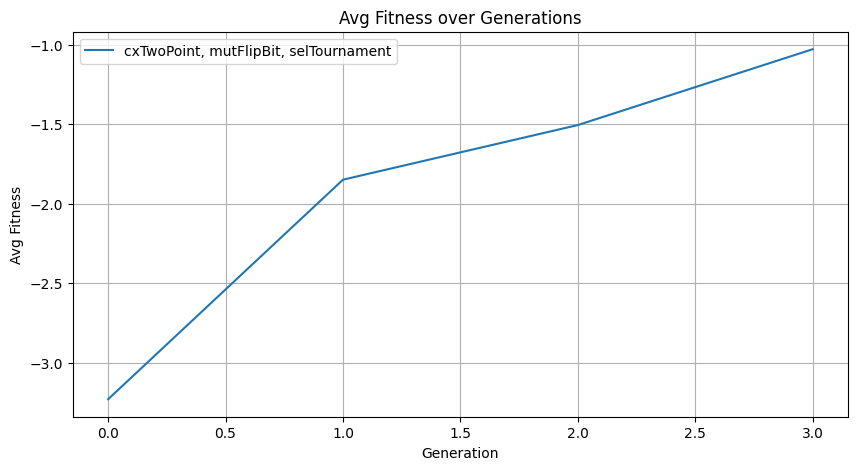

C:\Users\20193567\AppData\Local\Temp\ipykernel_10540\1768667079.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(max_fitness, labels=labels)


ValueError: Dimensions of labels and X must be compatible

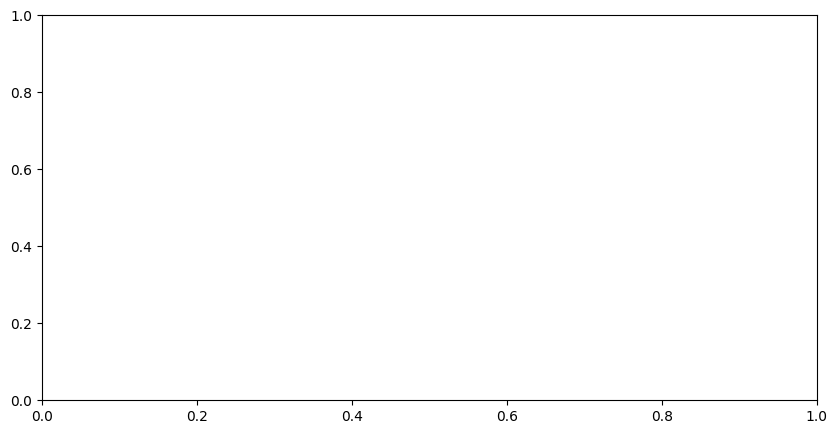

In [ ]:
# +----------------+----------------------+-------------------+---------+
# |   Crossover    |       Mutation       |     Selection     |  Time   |
# |                |                      |                   | (s)     |
# +----------------+----------------------+-------------------+---------+
# | cxTwoPoint     | mutFlipBit           | selTournament     |         |
# | cxTwoPoint     | mutFlipBit           | selRoulette       |         |
# | cxTwoPoint     | mutShuffleIndexes    | selTournament     |         |
# | cxTwoPoint     | mutShuffleIndexes    | selRoulette       |         |
# | cxOrdered      | mutFlipBit           | selTournament     |         |
# | cxOrdered      | mutFlipBit           | selRoulette       |         |
# | cxOrdered      | mutShuffleIndexes    | selTournament     |         |
# | cxOrdered      | mutShuffleIndexes    | selRoulette       |         |
# +----------------+----------------------+-------------------+---------+

import itertools
import pandas as pd
import time
import matplotlib.pyplot as plt

# Define the combinations of crossover, mutation, and selection operators
CROSSOVERS = [tools.cxTwoPoint, tools.cxOrdered]
MUTATIONS = [tools.mutFlipBit, tools.mutShuffleIndexes]
SELECTIONS = [tools.selTournament, tools.selRoulette]

NRUNS = 3  # Number of runs for each combination

combinations = list(itertools.product(CROSSOVERS, MUTATIONS, SELECTIONS))[:1] # REMOVE [:1] AFTER TESTING
labels = [f"{crossover.__name__}, {mutation.__name__}, {selection.__name__}" for crossover, mutation, selection in combinations]

timing_dict = {}
max_fitness_arr = np.zeros((NRUNS, len(combinations), NGEN+1))

for i,combination in enumerate(combinations):
    # Start the timer for this combination
    start_time = time.time()

    # Run the genetic algorithm with the current combination of operators
    crossover, mutation, selection = combination
    print(f"Running combination: {labels[i]} (combination {i+1}/{len(combinations)})")
    for k in range(NRUNS):
        print(f"Run {k+1}/{NRUNS}")
        max_fitness = run_combination(toolbox, crossover, mutation, selection, NGEN, POPSIZE, INDPB, TOURNSIZE)
        max_fitness_arr[k,i,:] = np.array(max_fitness)

    print(f"Finished combination: {labels[i]}")

    # Stop the timer for this combination
    end_time = time.time()
    elapsed_time = end_time - start_time
    avg_time = elapsed_time / NRUNS
    print(f"Average time taken for {labels[i]}: {avg_time:.2f} seconds")
    timing_dict[labels[i]] = avg_time
    print(f"-" * 50)

# Save the data to a CSV file
timing_df = pd.DataFrame.from_dict(timing_dict, orient='index')
timing_df.to_csv("timing_resultsQ2_Tijn.csv")

max_fitness = np.max(max_fitness_arr, axis=0)
max_fitness_df = pd.DataFrame(max_fitness.T, columns=labels)
max_fitness_df.to_csv("max_resultsQ2_Tijn.csv", index=False)

average_best_fitness = np.mean(max_fitness_arr, axis=0)
ABF_df = pd.DataFrame(average_best_fitness.T, columns=labels)
ABF_df.to_csv("avg_resultsQ2_Tijn.csv", index=False)

C:\Users\20193567\AppData\Local\Temp\ipykernel_10540\1768667079.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(max_fitness, labels=labels)


ValueError: Dimensions of labels and X must be compatible

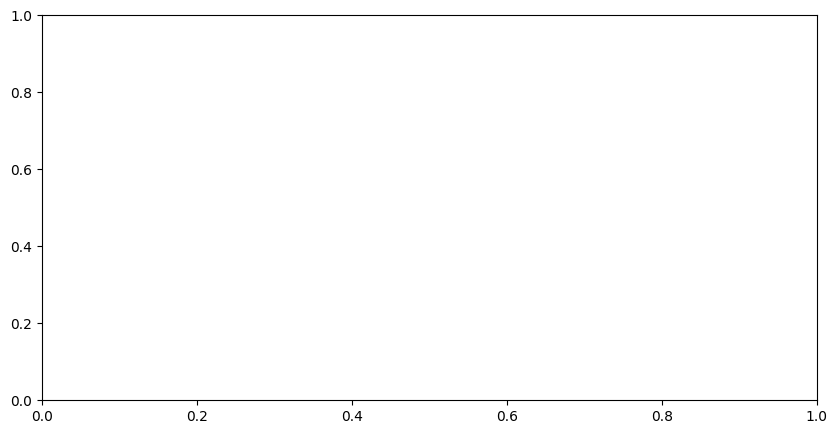

In [33]:
### Plotting the results for all combinations

# Load data from CSV files
timing_df = pd.read_csv("timing_resultsQ2_Tijn.csv", index_col=0)
max_fitness_df = pd.read_csv("max_resultsQ2_Tijn.csv")
# ABF_df = pd.read_csv("avg_resultsQ2_Tijn.csv")

# plotting
plot_boxplot(max_fitness, labels)
# plot_ABF(average_best_fitness, labels)

# Q4

In [11]:
def checkSelfLoops():
    def decorator(func):
        def wrapper(*args, **kwargs):
            offspring = func(*args, **kwargs)
            # Check for self-loops in the offspring
            for child in offspring:
                matrix = support.list_to_array(child)
                for i in range(len(matrix)):
                    if matrix[i][0] == matrix[i][1]:
                        # If a self-loop is found, replace add or subtract 1
                        if matrix[i][0] == NR_TRANSITIONS - 1:
                            matrix[i][0] = matrix[i][0] - 1                
                        else:
                            matrix[i][1] = matrix[i][0] + 1
                child = matrix.flatten().tolist()
            return offspring
        return wrapper
    return decorator

def checkBackwardsVisibleLoops():
    def decorator(func):
        def wrapper(*args, **kwargs):
            offspring = func(*args, **kwargs)
            # Check for backwards visible loops in the offspring
            for child in offspring:
                matrix = support.list_to_array(child)
                for i in range(len(matrix)): 
                    temp = matrix[i][0]
                    if matrix[i][0] > matrix[i][1]:
                        # If a backwards visible loop is found swap the values
                        matrix[i][0] = matrix[i][1]
                        matrix[i][1] = temp
                child = matrix.flatten().tolist()
            return offspring
        return wrapper
    return decorator


In [77]:
matrix = [[1, 2],[3, 4], [5, 6]]
list = [1, 2, 3, 4, 5, 6]
arr = np.array(list).reshape(3, 2)
print(arr)

arr.flatten().tolist()

[[1 2]
 [3 4]
 [5 6]]


[1, 2, 3, 4, 5, 6]

In [12]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Creates a fitness class for maximization
creator.create("Individual", list, fitness=creator.FitnessMax) # Creates an individual class that inherits from list and has a fitness attribute

toolbox = base.Toolbox()

NGEN = 10        # Number of Generations
# Just took standard values for hyperparameters
POP_SIZE = 100   # Population size
CXPB = 0.5       # Crossover Probability
MUTPB = 0.2      # Mutation Probability
TOURNSIZE = 3    # Tournament size for selection
INDPB = 0.05     # Independent probability for attributes mutation

toolbox.register("attr_int", random.randint, 0, NR_PLACES - 1) # Use NR_PLACES - 1 since indexing starts at 0
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=NR_TRANSITIONS * 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", support.fitness) # Uses fitness function from support to evaluate fitness
toolbox.register("mate", tools.cxTwoPoint) 
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB) # indpb is the probability of flipping each bit in the individual
toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)  # tournsize is the number of individuals to select for the tournament, fittest is selected for next gen

toolbox.decorate("mate", checkSelfLoops()) # Decorate the mate function to check for self-loops
toolbox.decorate("mate", checkBackwardsVisibleLoops()) # Decorate the mate function to check for backwards visible loops

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("std", np.std)

pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1) # Store the best individual
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                   stats=stats, halloffame=hof, verbose=True)



C:\Users\20193567\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\20193567\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	avg     	min	std    
0  	100   	-2 	-9.32747	-17	3.44391
1  	65    	-1.65899	-6.56324	-11	2.22261
2  	59    	-1.65899	-4.6343 	-9 	1.74077
3  	67    	-0.658987	-3.34683	-10	1.65431
4  	50    	-0.658987	-2.37244	-7 	1.11381
5  	49    	-0.658987	-1.83777	-8 	1.24965
6  	55    	0.31568  	-1.17431	-4.68111	0.780856
7  	55    	0.385971 	-0.822449	-3.70324	0.613449
8  	73    	0.415389 	-0.695312	-6.70324	1.07856 
9  	52    	0.577841 	-0.318375	-3.68111	0.807241
10 	61    	0.514392 	-0.0893583	-3      	0.77769 
